## VGG16

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

Using TensorFlow backend.


In [21]:
model = VGG16(weights='imagenet')

In [22]:
img_path = './img/2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [23]:
%%time
preds = model.predict(x)

Wall time: 813 ms


In [24]:
out = decode_predictions(preds, top=3)[0]
for i in range(len(out)):
    print('%2d => %s' % (out[i][2]*100, out[i][1]))

99 => school_bus
 0 => minibus
 0 => passenger_car


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## ResNet50

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [19]:
model = ResNet50(weights='imagenet')

In [75]:
img_path = './img/3.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Start the camera

In [15]:
camObj = cv2.VideoCapture(1)
camObj.isOpened()

True

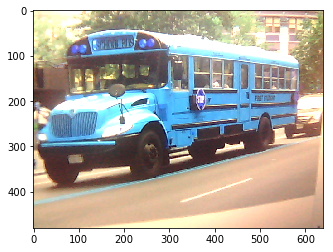

In [192]:
readOK, frame = camObj.read()
readOK, frame = camObj.read()
plt.imshow(frame);

In [193]:
x = cv2.resize(frame, (224, 224))
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [194]:
%%time
preds = model.predict(x)

Wall time: 62 ms


In [195]:
out = decode_predictions(preds, top=3)[0]
for i in range(len(out)):
    print('%2d => %s' % (out[i][2]*100, out[i][1]))

76 => minibus
15 => school_bus
 2 => trolleybus


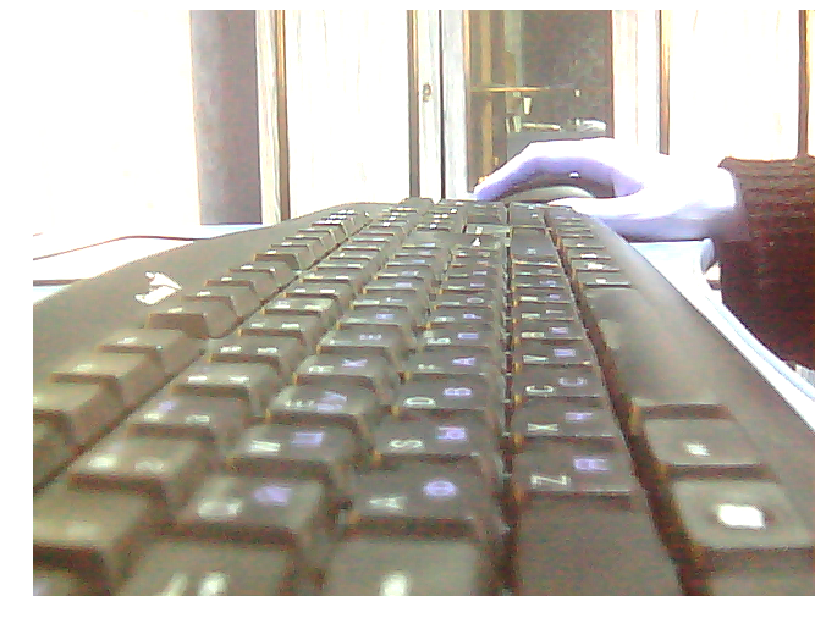

In [74]:
readOK, frame = camObj.read()
plt.figure(figsize=(14,14))
plt.imshow(frame)
plt.axis('off');

## InceptionV3

In [26]:
from keras.applications.inception_v3 import InceptionV3

In [27]:
model = InceptionV3(weights='imagenet')

In [29]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 149, 149, 32)  864                                          
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 149, 149, 32)  96                                           
____________________________________________________________________________________________________
activation_50 (Activation)       (None, 149, 149, 32)  0                                            
___________________________________________________________________________________________